In [1]:
from my_gan import *

In [2]:
main()

Epoch 0: loss_g = 1.0247769355773926, loss_d_real = 0.44863855838775635, loss_d_fake = 0.8818117380142212
Epoch 0: loss_g = 7.0542731285095215, loss_d_real = 0.0006338878883980215, loss_d_fake = 0.003073106985539198
Epoch 1: loss_g = 5.922114372253418, loss_d_real = 0.01271817646920681, loss_d_fake = 0.011944071389734745
Epoch 1: loss_g = 8.156801223754883, loss_d_real = 0.012604095041751862, loss_d_fake = 0.002805167343467474
Epoch 2: loss_g = 8.106913566589355, loss_d_real = 0.02449723146855831, loss_d_fake = 0.0031170775182545185
Epoch 2: loss_g = 6.881385803222656, loss_d_real = 0.0011572850635275245, loss_d_fake = 0.018155444413423538
Epoch 3: loss_g = 5.838218688964844, loss_d_real = 0.014464226551353931, loss_d_fake = 0.027185453101992607
Epoch 3: loss_g = 4.959341049194336, loss_d_real = 0.03893598914146423, loss_d_fake = 0.0631415843963623
Epoch 4: loss_g = 4.584214210510254, loss_d_real = 0.1491675227880478, loss_d_fake = 0.03463361784815788
Epoch 4: loss_g = 2.26047754287719

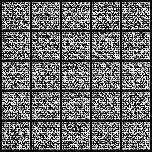

before start


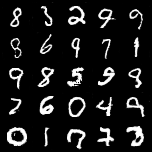

half way


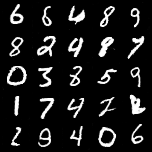

after train


In [4]:
from PIL import Image
display(Image.open("images/0.png"))
print("before start")
display(Image.open("images/90000.png"))
print("half way")
display(Image.open("images/182500.png"))
print("after train")

In [5]:
from my_gan import *
generator = Generator()
generator.load_state_dict(torch.load('mnist_generator.pt'))

<All keys matched successfully>

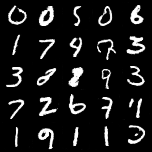

In [7]:
import torch
from pylab import *
device = torch.device('cuda')
generator = generator.to(device)
z = torch.randn(64, 100).to(device)
z = z.view(64,100,1,1)
gen_imgs = generator(z)
gen_imgs = gen_imgs.view(64, 1, 28, 28)
save_image(gen_imgs[:25],
   'inter.png',
   nrow=5, normalize=True)
display(Image.open("inter.png"))

In [9]:
save_image(gen_imgs[4],
   'digit_6.png',
   nrow=5, normalize=True)
save_image(gen_imgs[10],
   'digit_3.png',
   nrow=5, normalize=True)
digit_6 = z[4]
digit_3 = z[10]
display(Image.open("digit_6.png"))
display(Image.open("digit_3.png"))

In [11]:
percent = np.linspace(0, 1, 9)
z_inters = torch.zeros(9, 100).to(device)
for idx, per in enumerate(percent):
    z_inter = (1.0 - per) * digit_6 + per * digit_3
    z_inter = z_inter.view(1, 100)
    z_inters[idx: idx+1] += z_inter


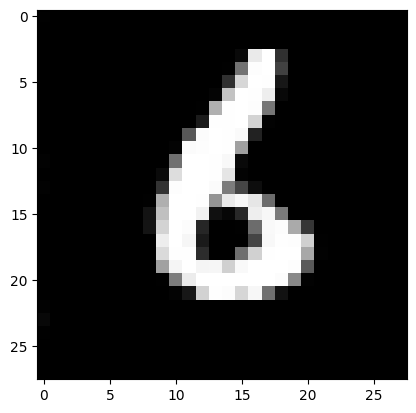

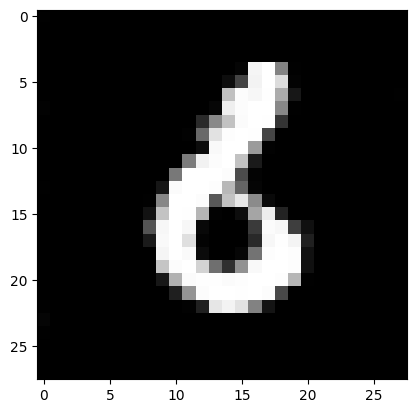

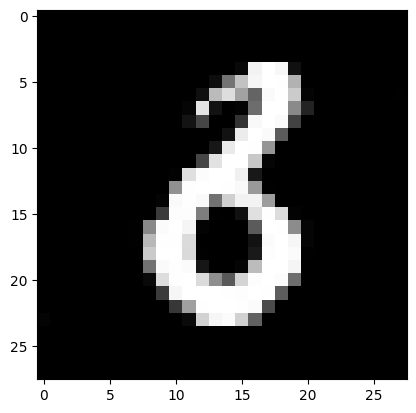

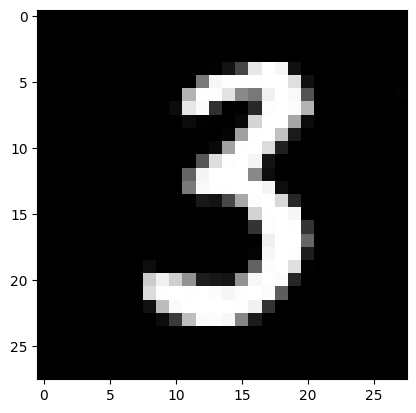

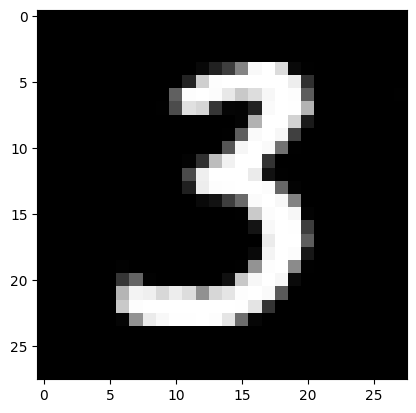

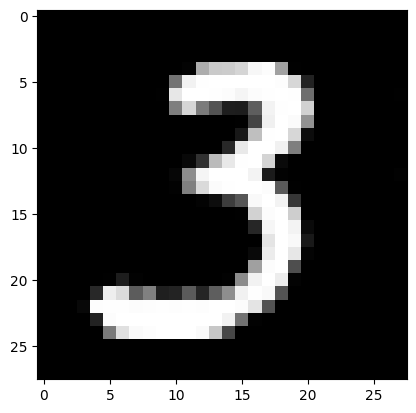

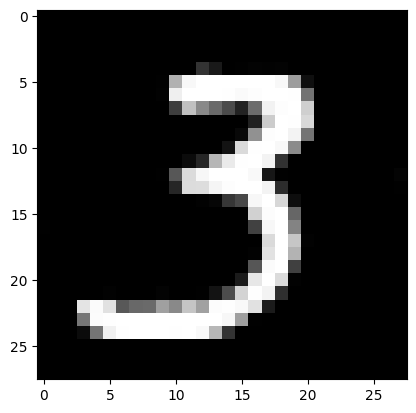

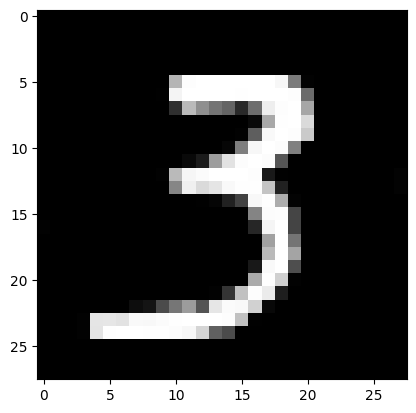

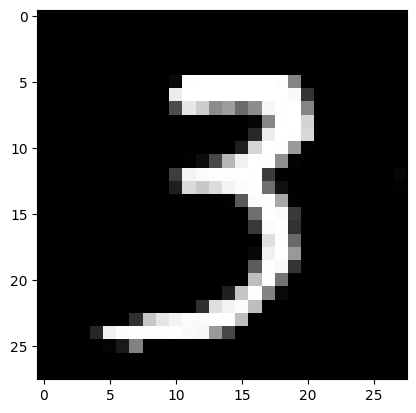

In [14]:
z_inters = z_inters.view(9,100,1,1)
imgs = generator(z_inters).cpu().data
for i in range(9):
    plt.imshow(imgs[i].reshape((28,28)), cmap='Greys_r')
    plt.show()